# Mental Health Survey in the Tech Industry

<p align="center">
  <img src="https://qz.com/wp-content/uploads/2017/07/david-mao-7091-e1499867773401.jpg?quality=80&strip=all&w=1600"/>
</p>

Mental health is a level of psychological well-being or an absence of mental illness. It is the "psychological state of someone who is functioning at a satisfactory level of emotional and behavioural adjustment"

In this **kernel**, I hope to explore some relevant stats extracted from the **Mental Health Survey - Tech Industry, 2014"**. And since the data was found to be extremely messy & largely categorical in nature so therefore **data cleaning** was an important part of this analysis.


#### Necessary Library Imports & Data Loading

In [103]:
import os
import gc
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns
%matplotlib inline

In [104]:
data = pd.read_csv('data/survey_2014.csv')
data.shape

(1259, 27)

#### Let us take a brief look at the data to get an idea - 

In [105]:
data.sample(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
371,2014-08-27 15:20:53,41,m,United States,WA,No,Yes,Yes,Often,More than 1000,...,Somewhat difficult,Maybe,No,Yes,Some of them,No,Maybe,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
419,2014-08-27 15:31:40,55,M,United States,ID,No,Yes,Yes,Sometimes,1-5,...,Don't know,Yes,Maybe,No,No,No,No,No,Yes,NaN
669,2014-08-28 07:01:30,43,male,France,NaN,No,No,No,NaN,100-500,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No,NaN
1143,2014-09-01 10:40:32,27,female,United Kingdom,NaN,No,Yes,No,NaN,More than 1000,...,Don't know,Maybe,No,No,No,No,Yes,Yes,No,NaN
1226,2015-02-21 17:19:18,39,Male,Netherlands,NaN,No,No,No,NaN,More than 1000,...,Somewhat easy,Maybe,Maybe,No,Some of them,No,No,Yes,No,NaN
340,2014-08-27 14:38:54,35,Male,United States,MI,No,No,No,NaN,26-100,...,Don't know,No,No,Yes,Yes,No,No,No,No,NaN
530,2014-08-27 17:39:58,27,Male,United Kingdom,NaN,No,No,No,NaN,6-25,...,Don't know,No,No,Some of them,Yes,No,Yes,Don't know,No,NaN
1038,2014-08-29 11:11:00,34,Female,United States,CA,No,No,No,Sometimes,1-5,...,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
511,2014-08-27 16:47:48,25,f,United States,WA,No,No,No,Sometimes,6-25,...,Somewhat easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN


In [106]:
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

**Gender** oddly has 49 unique values & therefore might require some cleaning!

In [107]:
gender_clean = {
    "female":"Female",
    "male":"Male",
    "Male":"Male",
    "male-ish":"Male",
    "maile":"Male",
    "trans-female":"Female",
    "cis female":"Female",
    "f":"Female",
    "m":"Male",
    "M":"Male",
    "something kinda male?":"Male",
    "cis male":"Male",
    "woman":"Female",
    "mal":"Male",
    "male (cis)":"Male",
    "queer/she/they":"Female",
    "non-binary":"Unspecified",
    "femake":"Female",
    "make":"Male",
    "nah":"Unspecified",
    "all":"Unspecified",
    "enby":"Unspecified",
    "fluid":"Unspecified",
    "genderqueer":"Unspecified",
    "androgyne":"Unspecified",
    "agender":"Unspecified",
    "cis-female/femme":"Female",
    "guy (-ish) ^_^":"Male",
    "male leaning androgynous":"Male",
    "man":"Male",
    "male ":"Male",
    "trans woman":"Female",
    "msle":"Male",
    "neuter":"Unspecified",
    "female (trans)":"Female",
    "queer":"Unspecified",
    "female (cis)":"Female",
    "mail":"Male",
    "a little about you":"Unspecified",
    "malr":"Male",
    "p":"Unspecified",
    "femail":"Female",
    "cis man":"Male",
    "ostensibly male, unsure what that really means":"Male",
    "female ":"Female",
    "Female":"Female",
    "Male-ish":"Male"
}

data.Gender = data.Gender.str.lower()
data.Gender = data.Gender.apply(lambda x: gender_clean[x])

## Some basic employment statistics

- Distribution on the basis of **Gender**. (Need more women...
- How does the age vary in the professional industry?

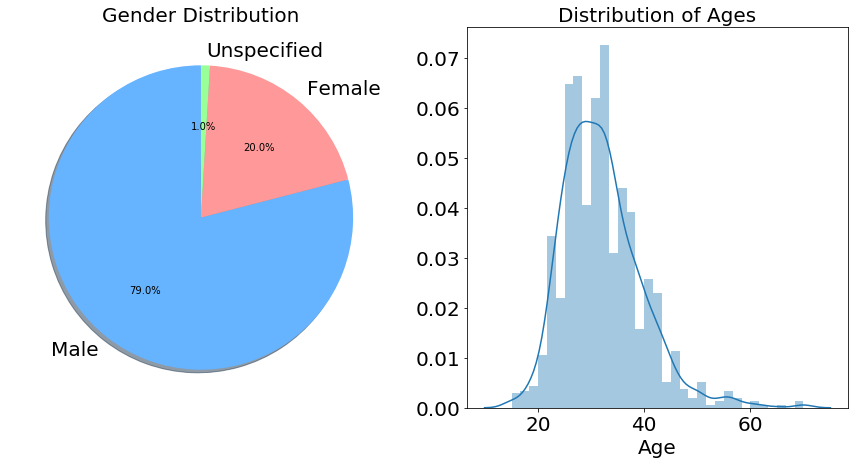

In [14]:
f, ax = plt.subplots(1,2, figsize=(15,7))
ax1 = ax[0].pie(list(data['Gender'].value_counts()), 
                   labels=['Male','Female','Unspecified'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
ax[0].set_title("Gender Distribution")
ax[1].set_title("Distribution of Ages")
ax2 = sns.distplot(data.Age.clip(15,70), ax=ax[1])

I thought it would also be interesting to extract other basic stats about **Age** here like *mean, standard dev, quartile values* etc. The average age of an IT employee stands at only **32**, quite surprising!

In [36]:
pd.DataFrame(data.Age.clip(15,60).describe())

,Age
count,1259.000000
mean,32.023828
std,7.374455
min,15.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,60.000000


## Participation in the Survery - by Country

Although, the United States dominates this category it would've been great if developing nations such as **India**, **Russia** & **Israel** had more participants since little is known about the working conditions in these countries & health issues that working professionals from these countries face.

Another thing, due to this extreme domination of the US in this survey, it has kind-of rendered it useless to do a country-wise analysis since there are *<50* participants from a majority of the countries.

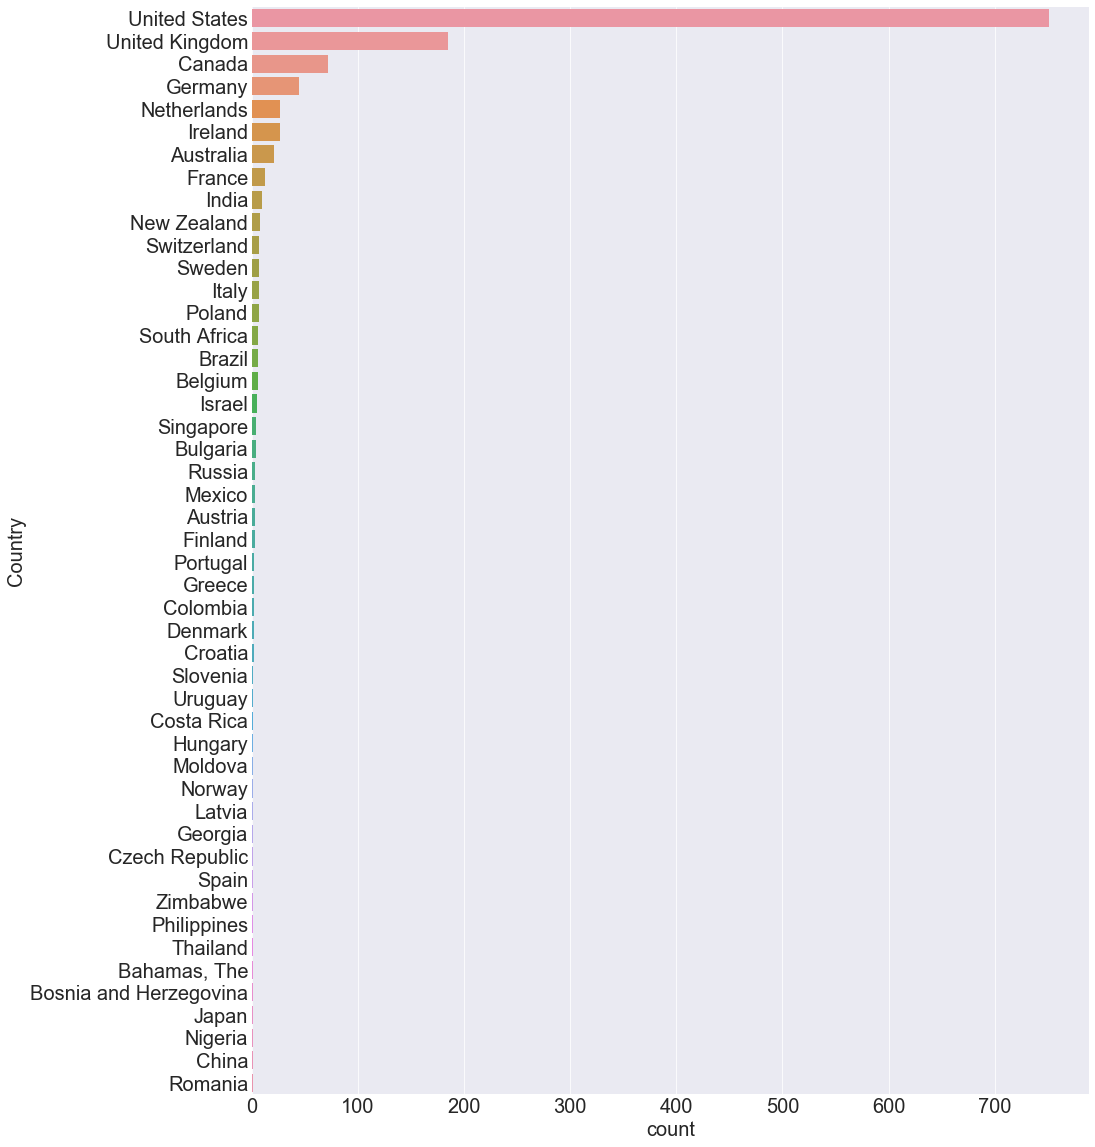

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,20))
sns.countplot(y='Country', data=data, 
              orient='h', order=data.Country.value_counts().index)
plt.show()

## How big/small is your company?

About 75% of the employees belong to the companies with less than 500 employees deeming them as very small ventures. Quite typical of the tech-industry.

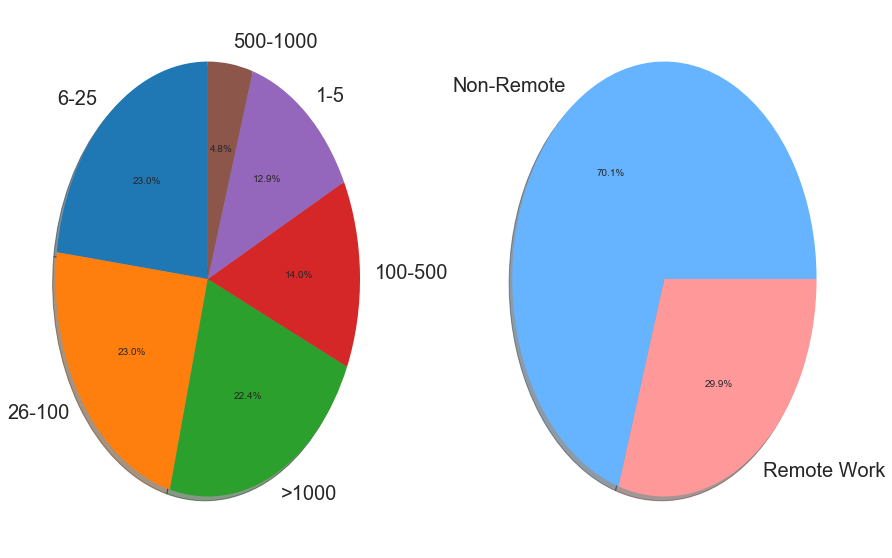

In [54]:
f, ax = plt.subplots(1,2, figsize=(15,10))
patches, texts, autotexts = ax[0].pie(list(data['no_employees'].value_counts()), 
                   labels=['6-25', '26-100', '>1000', '100-500', '1-5', '500-1000'],
                  autopct='%1.1f%%', shadow=True, startangle=90)
new = ax[1].pie(list(data['remote_work'].value_counts()),
                                     labels=['Non-Remote', 'Remote Work'],
                                     autopct='%1.1f%%', shadow=True, startangle=0,colors=['#66b3ff','#ff9999'])

Text(0,0.5,'# Reponses')

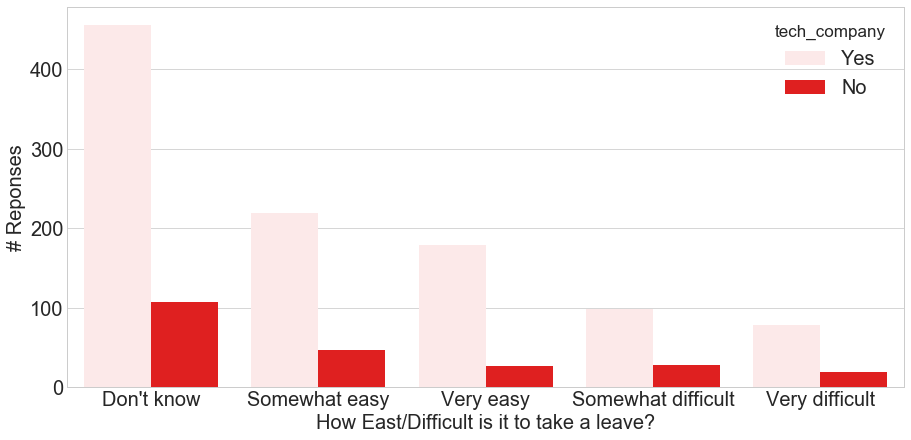

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.countplot(x='leave', data=data, order=data.leave.value_counts().index, 
              hue='tech_company', color='r')
plt.xlabel("How East/Difficult is it to take a leave?")
plt.ylabel("# Reponses")

In [77]:
company_characs = [
    "treatment",
    "benefits",
    "care_options",
    "wellness_program",
]

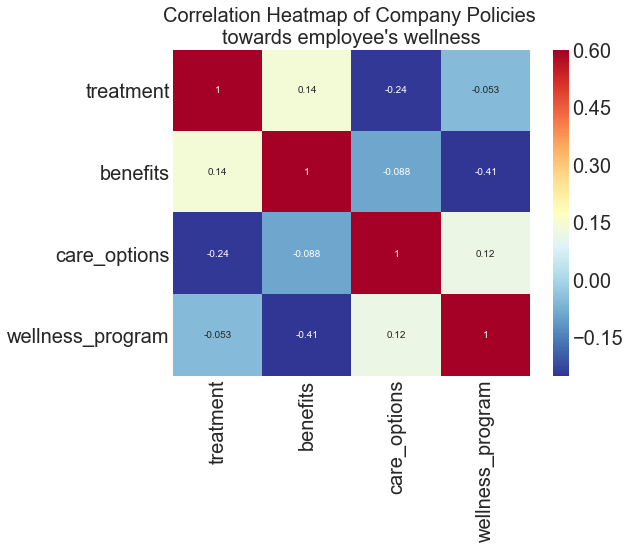

In [96]:
sns.set_style("darkgrid")
company_chars_corr = data[company_characs].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(company_chars_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap of Company Policies \ntowards employee's wellness");

In [83]:
wellbeing_indicators = [
    'seek_help',
    'mental_health_consequence',
    'obs_consequence',
    'mental_health_interview',
    'phys_health_consequence'
]

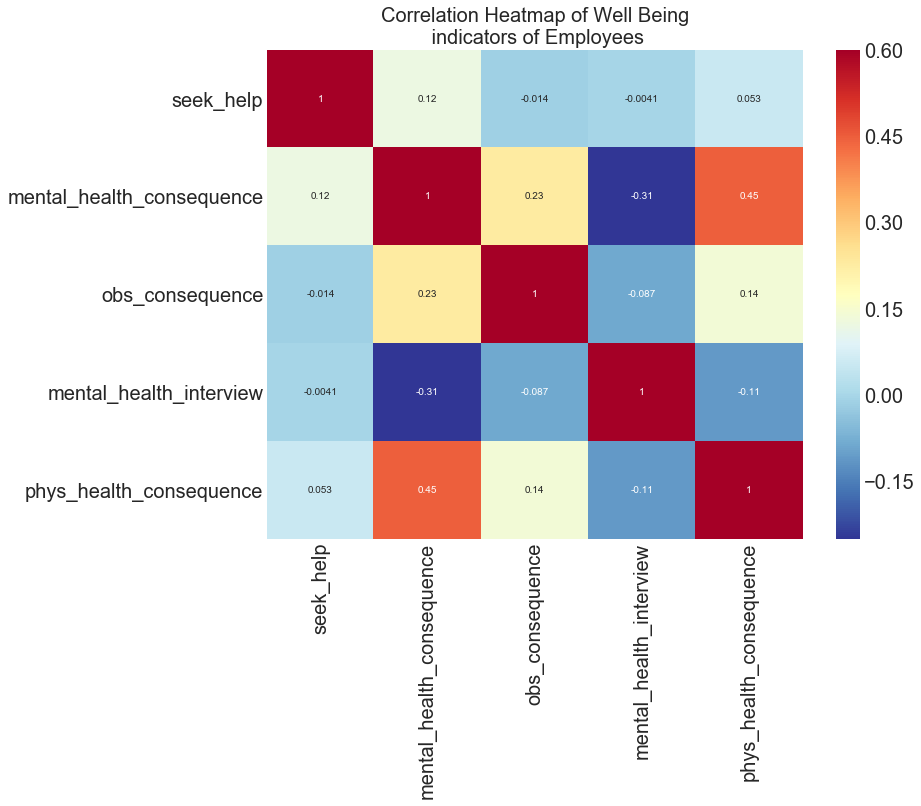

In [85]:
wellbeing_indicators_corr = data[wellbeing_indicators].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (12, 9))

# Heatmap of correlations
sns.heatmap(wellbeing_indicators_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap of Well Being\n indicators of Employees");

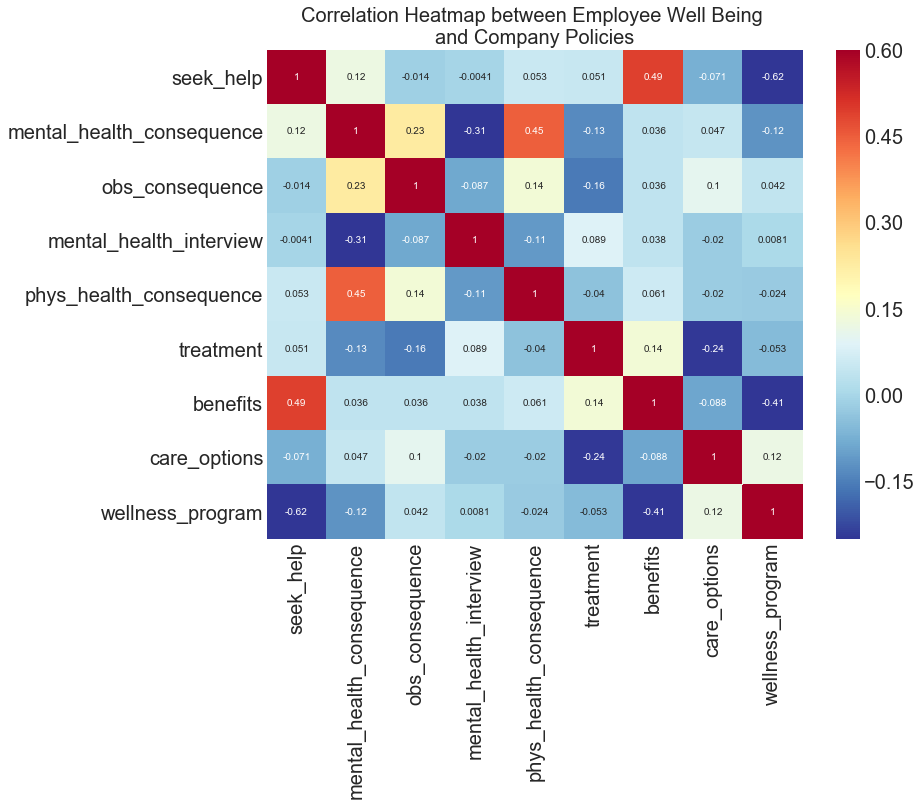

In [98]:
wellbeing_policy_corr = data[wellbeing_indicators + company_characs].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (12, 9))

# Heatmap of correlations
sns.heatmap(wellbeing_policy_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap between Employee Well Being \nand Company Policies");

### That'd be all for now, I'll continue adding some more visuals as I explore this data. 
 
**Let me know what you guys think in the comments below!**